In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
from scipy import sparse
from anndata import AnnData

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.19.4 scipy==1.6.3 pandas==1.2.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [3]:
results_file = 'write/concatenation'

In [4]:
adata1 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990687/', var_names='gene_ids', cache = True)
adata2 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990688/', var_names='gene_ids', cache = True)

... reading from cache file cache/Users-matanatmammadli-Desktop-software_prak-main-SRR9990687-matrix.h5ad
... reading from cache file cache/Users-matanatmammadli-Desktop-software_prak-main-SRR9990688-matrix.h5ad


In [5]:
X = ad.concat([adata1, adata2])

/usr/local/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
X

AnnData object with n_obs × n_vars = 4089 × 54

In [7]:
adata3 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990689/', var_names='gene_ids', cache=True)
adata4 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990690/', var_names = 'gene_ids', cache=True)

... reading from cache file cache/Users-matanatmammadli-Desktop-software_prak-main-SRR9990689-matrix.h5ad
... reading from cache file cache/Users-matanatmammadli-Desktop-software_prak-main-SRR9990690-matrix.h5ad


In [8]:
Y = ad.concat([adata3, adata4])

In [9]:
Y

AnnData object with n_obs × n_vars = 3945 × 54

In [10]:
adata5 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990791/', var_names='gene_ids', cache=True)
adata6 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990792/', var_names = 'gene_ids', cache=True)

... reading from cache file cache/Users-matanatmammadli-Desktop-software_prak-main-SRR9990791-matrix.h5ad
... reading from cache file cache/Users-matanatmammadli-Desktop-software_prak-main-SRR9990792-matrix.h5ad


In [11]:
Z = ad.concat([adata5, adata6])

In [12]:
Z

AnnData object with n_obs × n_vars = 3049 × 54

In [13]:
adata7 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990793/', var_names='gene_ids', cache=True)
adata8 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990794/', var_names = 'gene_ids', cache=True)

... reading from cache file cache/Users-matanatmammadli-Desktop-software_prak-main-SRR9990793-matrix.h5ad
... reading from cache file cache/Users-matanatmammadli-Desktop-software_prak-main-SRR9990794-matrix.h5ad


In [14]:
P = ad.concat([adata7, adata8])

In [15]:
P

AnnData object with n_obs × n_vars = 3048 × 54

In [16]:
XY = ad.concat([X, Y])

In [17]:
XY

AnnData object with n_obs × n_vars = 8034 × 54

In [18]:
ZP = ad.concat([Z, P])

In [19]:
ZP

AnnData object with n_obs × n_vars = 6097 × 54

In [20]:
adata = ad.concat([XY, ZP])

In [21]:
adata

AnnData object with n_obs × n_vars = 14131 × 54

normalizing counts per cell
    finished (0:00:00)


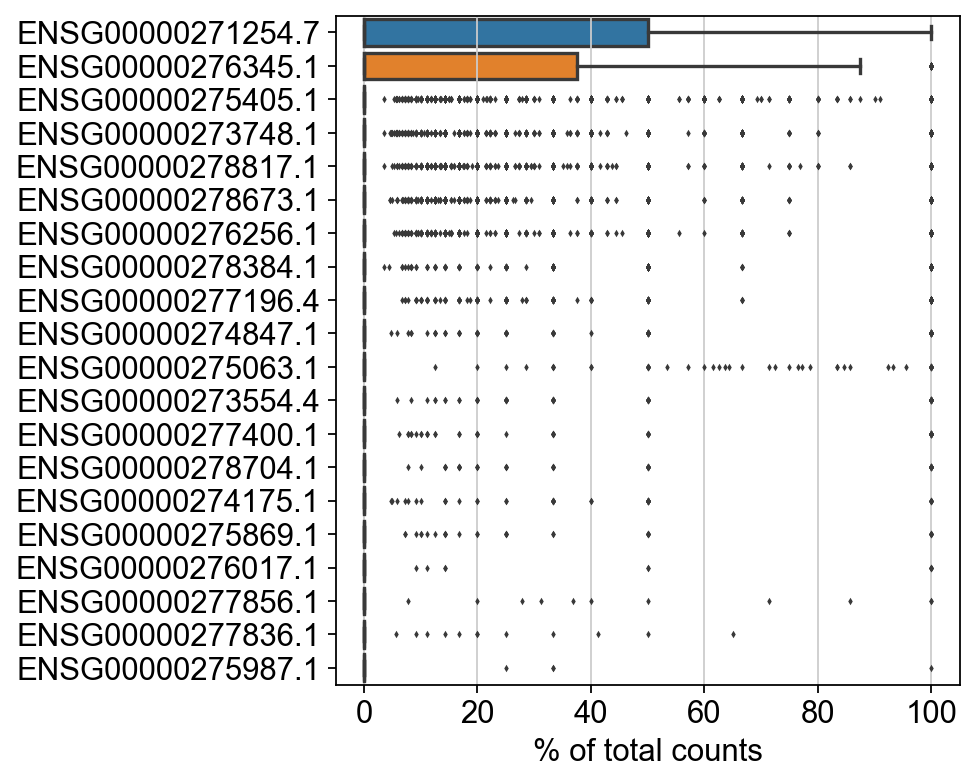

In [22]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [23]:
##sc.pp.filter_cells(adata, min_genes=200)
##sc.pp.filter_genes(adata, min_cells=3)

In [24]:
adata

AnnData object with n_obs × n_vars = 14131 × 54

In [25]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

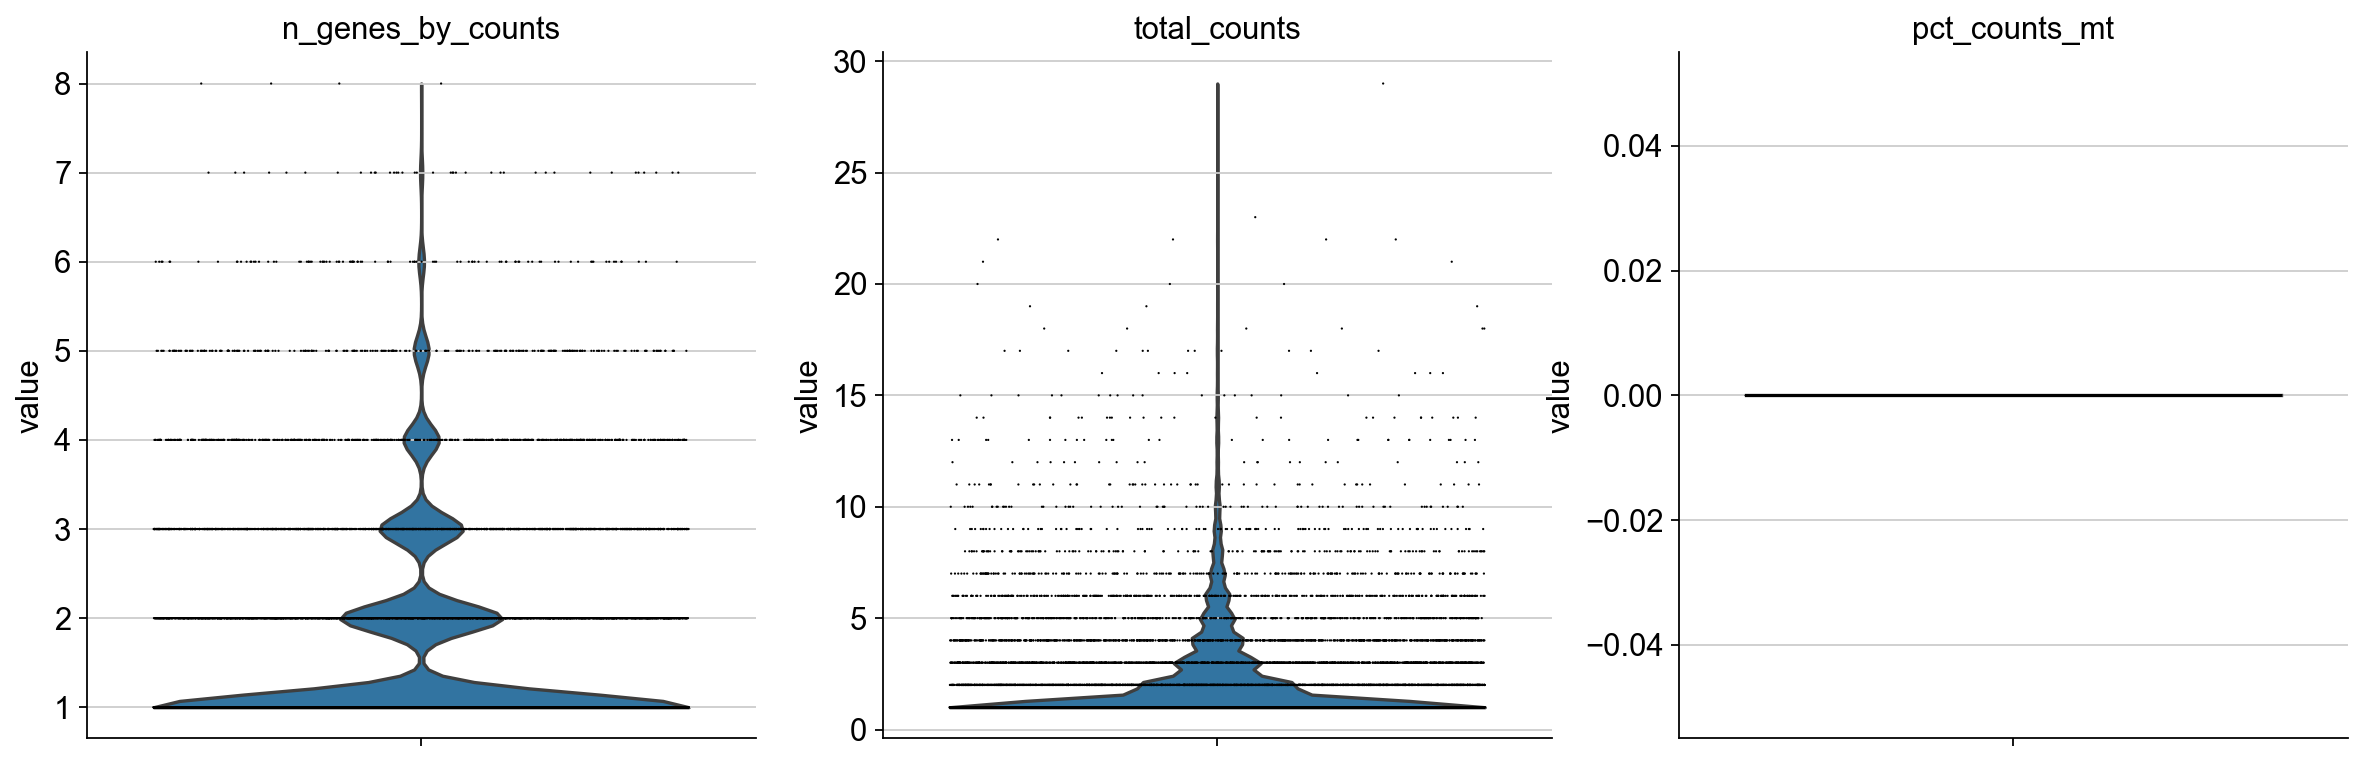

In [26]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

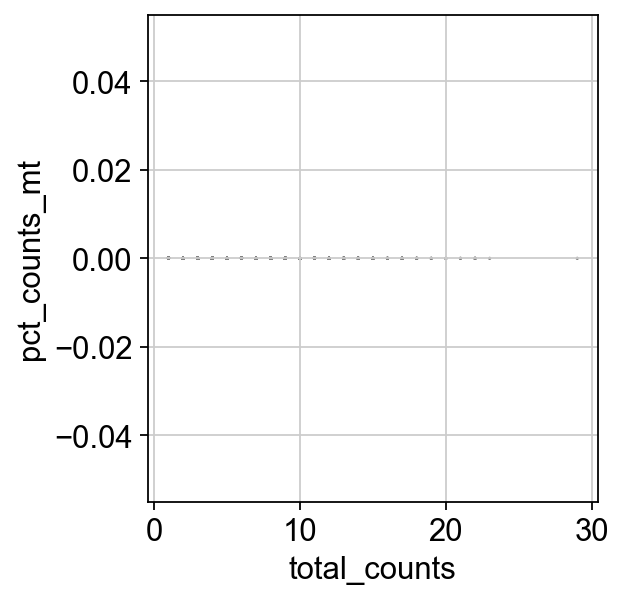

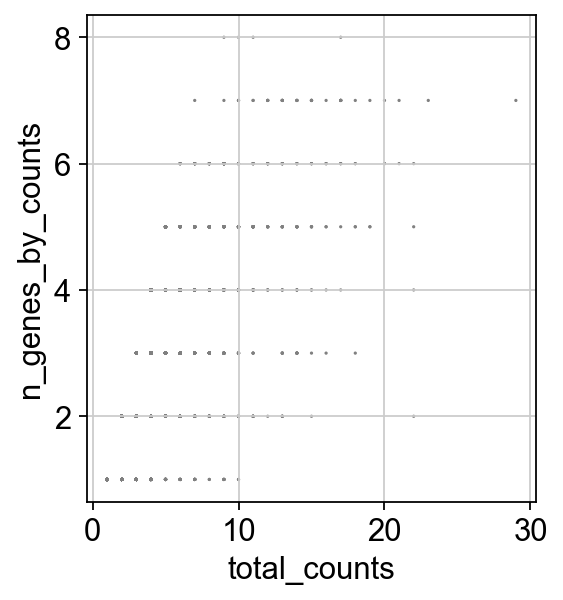

In [27]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [28]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [29]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [30]:
sc.pp.log1p(adata)

In [31]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


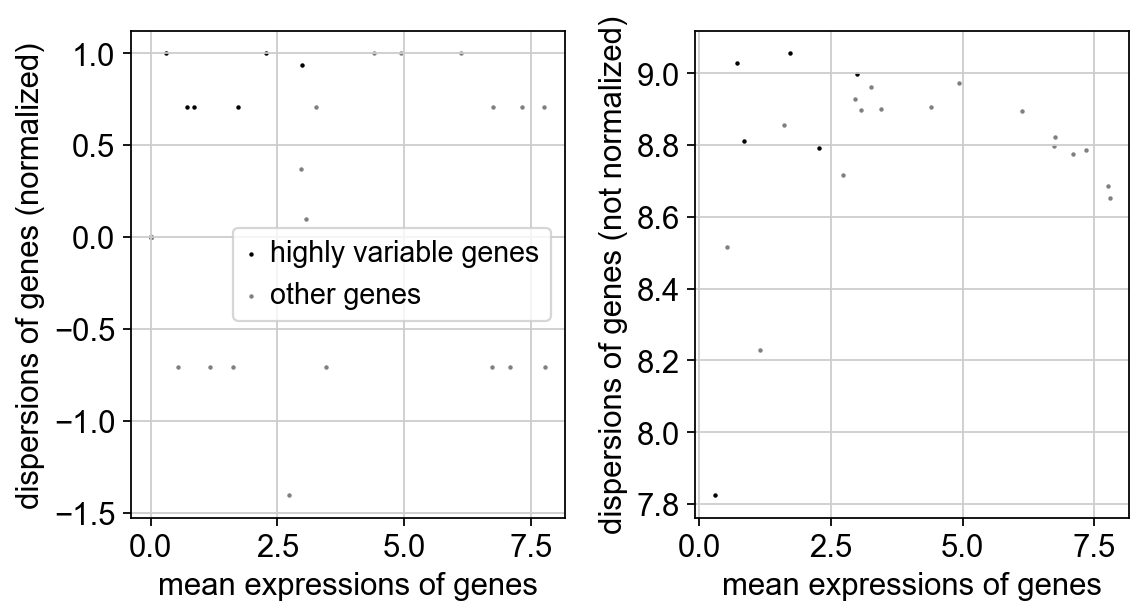

In [32]:
sc.pl.highly_variable_genes(adata)

In [33]:
adata.raw = adata

In [34]:
adata = adata[:, adata.var.highly_variable]

In [35]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:00)


In [36]:
sc.pp.scale(adata, max_value=10)

In [37]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=5
    finished (0:00:00)


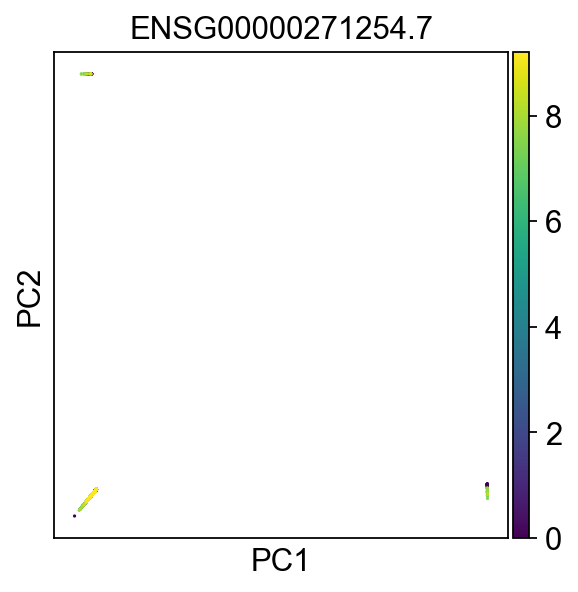

In [38]:
sc.pl.pca(adata, color='ENSG00000271254.7')

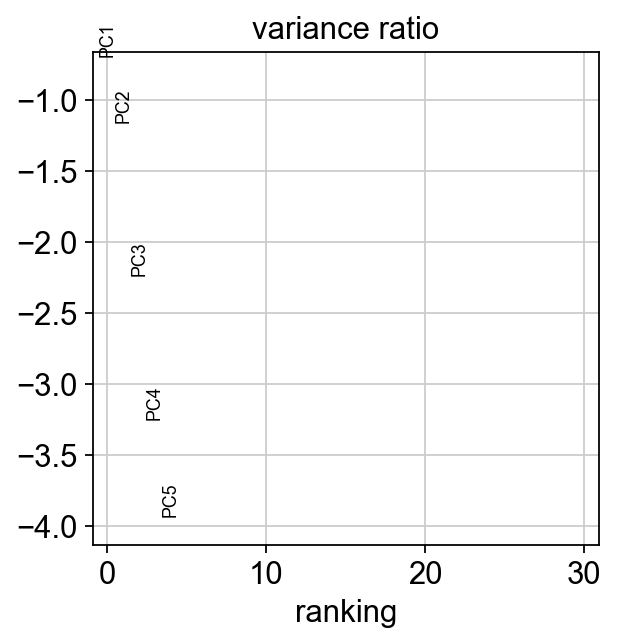

In [39]:
sc.pl.pca_variance_ratio(adata, log=True)

In [40]:
adata.write(results_file)


In [41]:
adata

AnnData object with n_obs × n_vars = 14131 × 6
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [42]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)


In [43]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


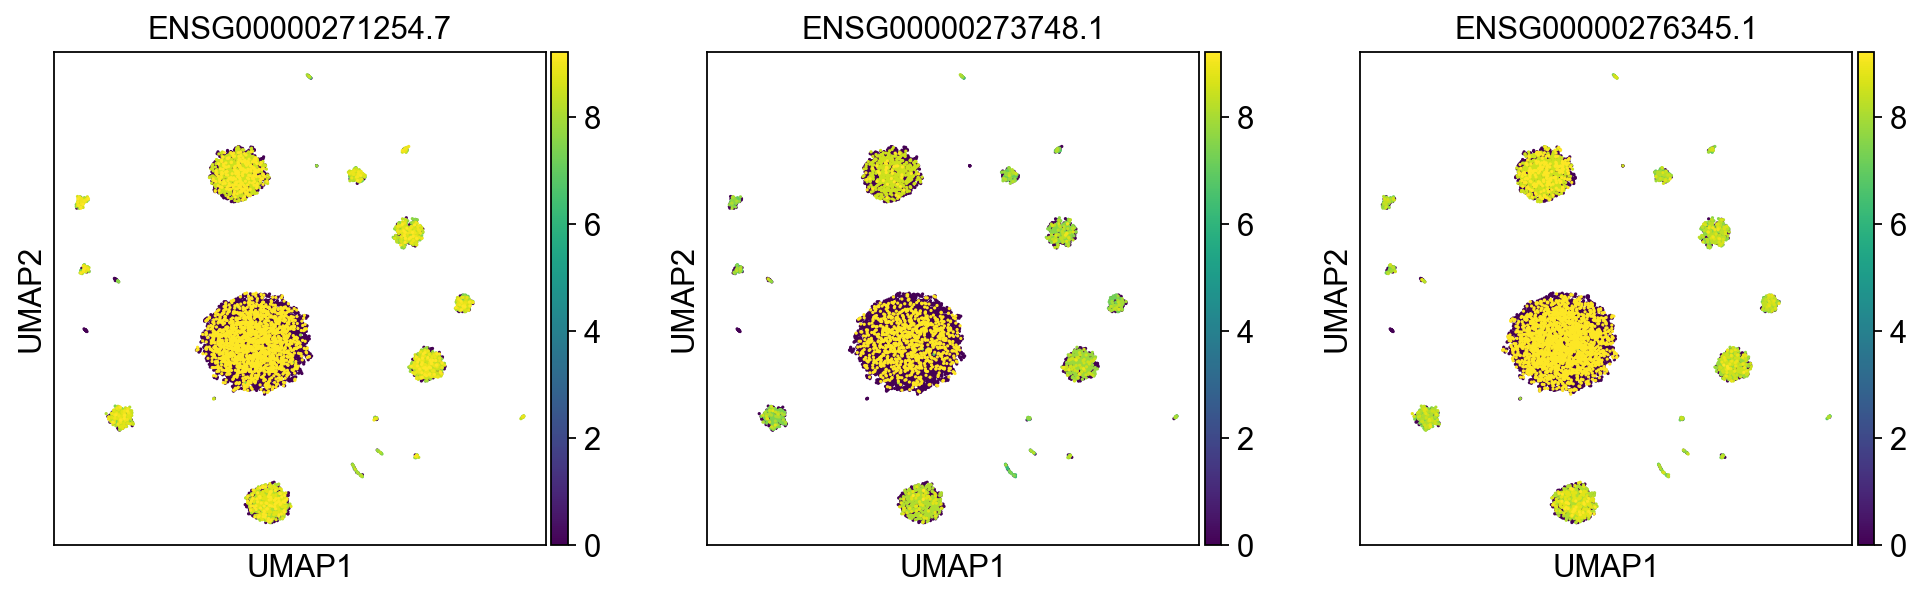

In [44]:
sc.pl.umap(adata, color=['ENSG00000271254.7','ENSG00000273748.1', 'ENSG00000276345.1'])

In [51]:
sc.pl.umap(adata, color=['ENSG00000273748.1', 'ENSG00000276345.1'], use_raw=False)

KeyError: 'Could not find key ENSG00000273748.1 in .var_names or .obs.columns.'

<Figure size 772.8x320 with 0 Axes>

In [47]:
sc.tl.leiden(adata, resolution =0.5)

running Leiden clustering
    finished: found 38 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


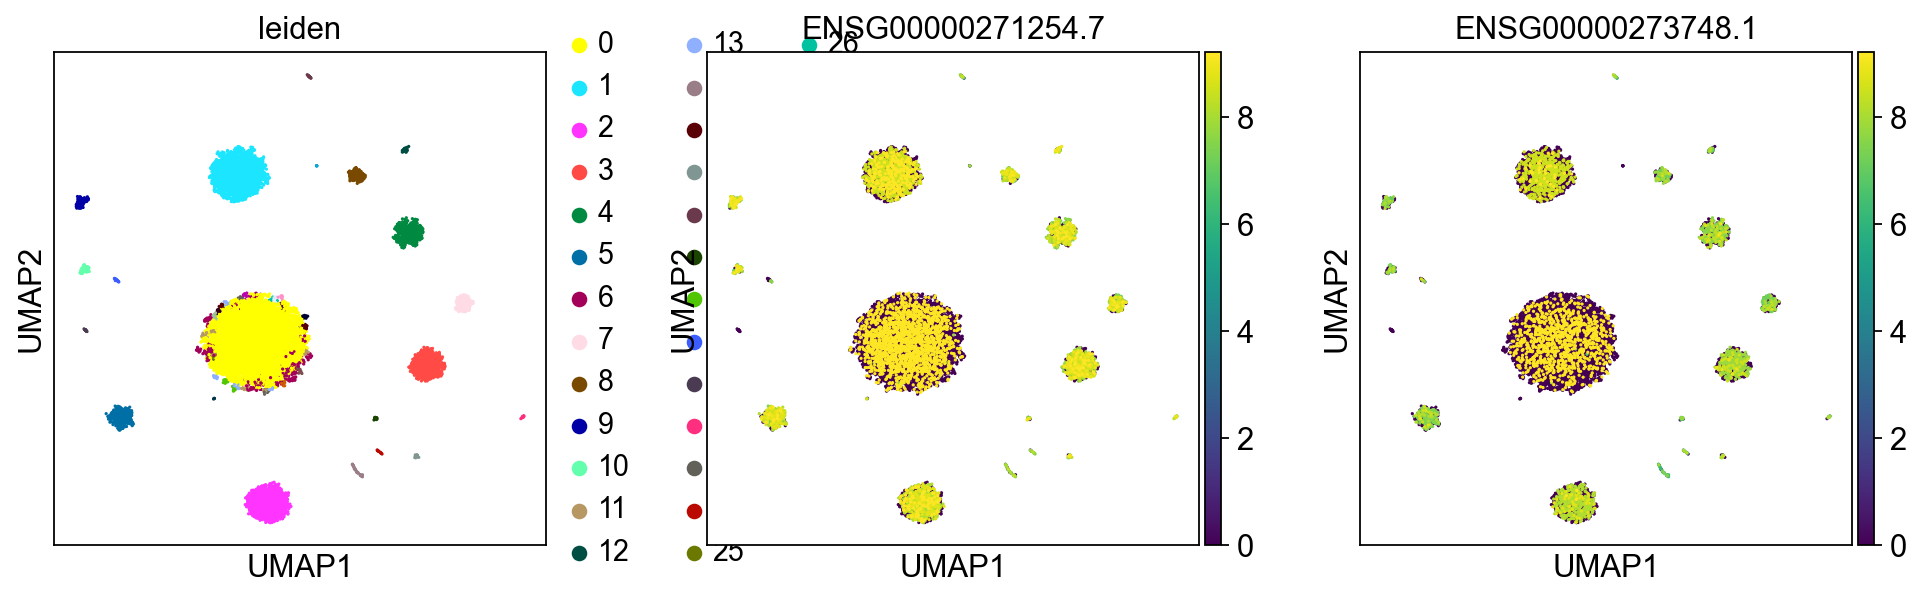

In [48]:
sc.pl.umap(adata, color=['leiden', 'ENSG00000271254.7','ENSG00000273748.1'])

In [49]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


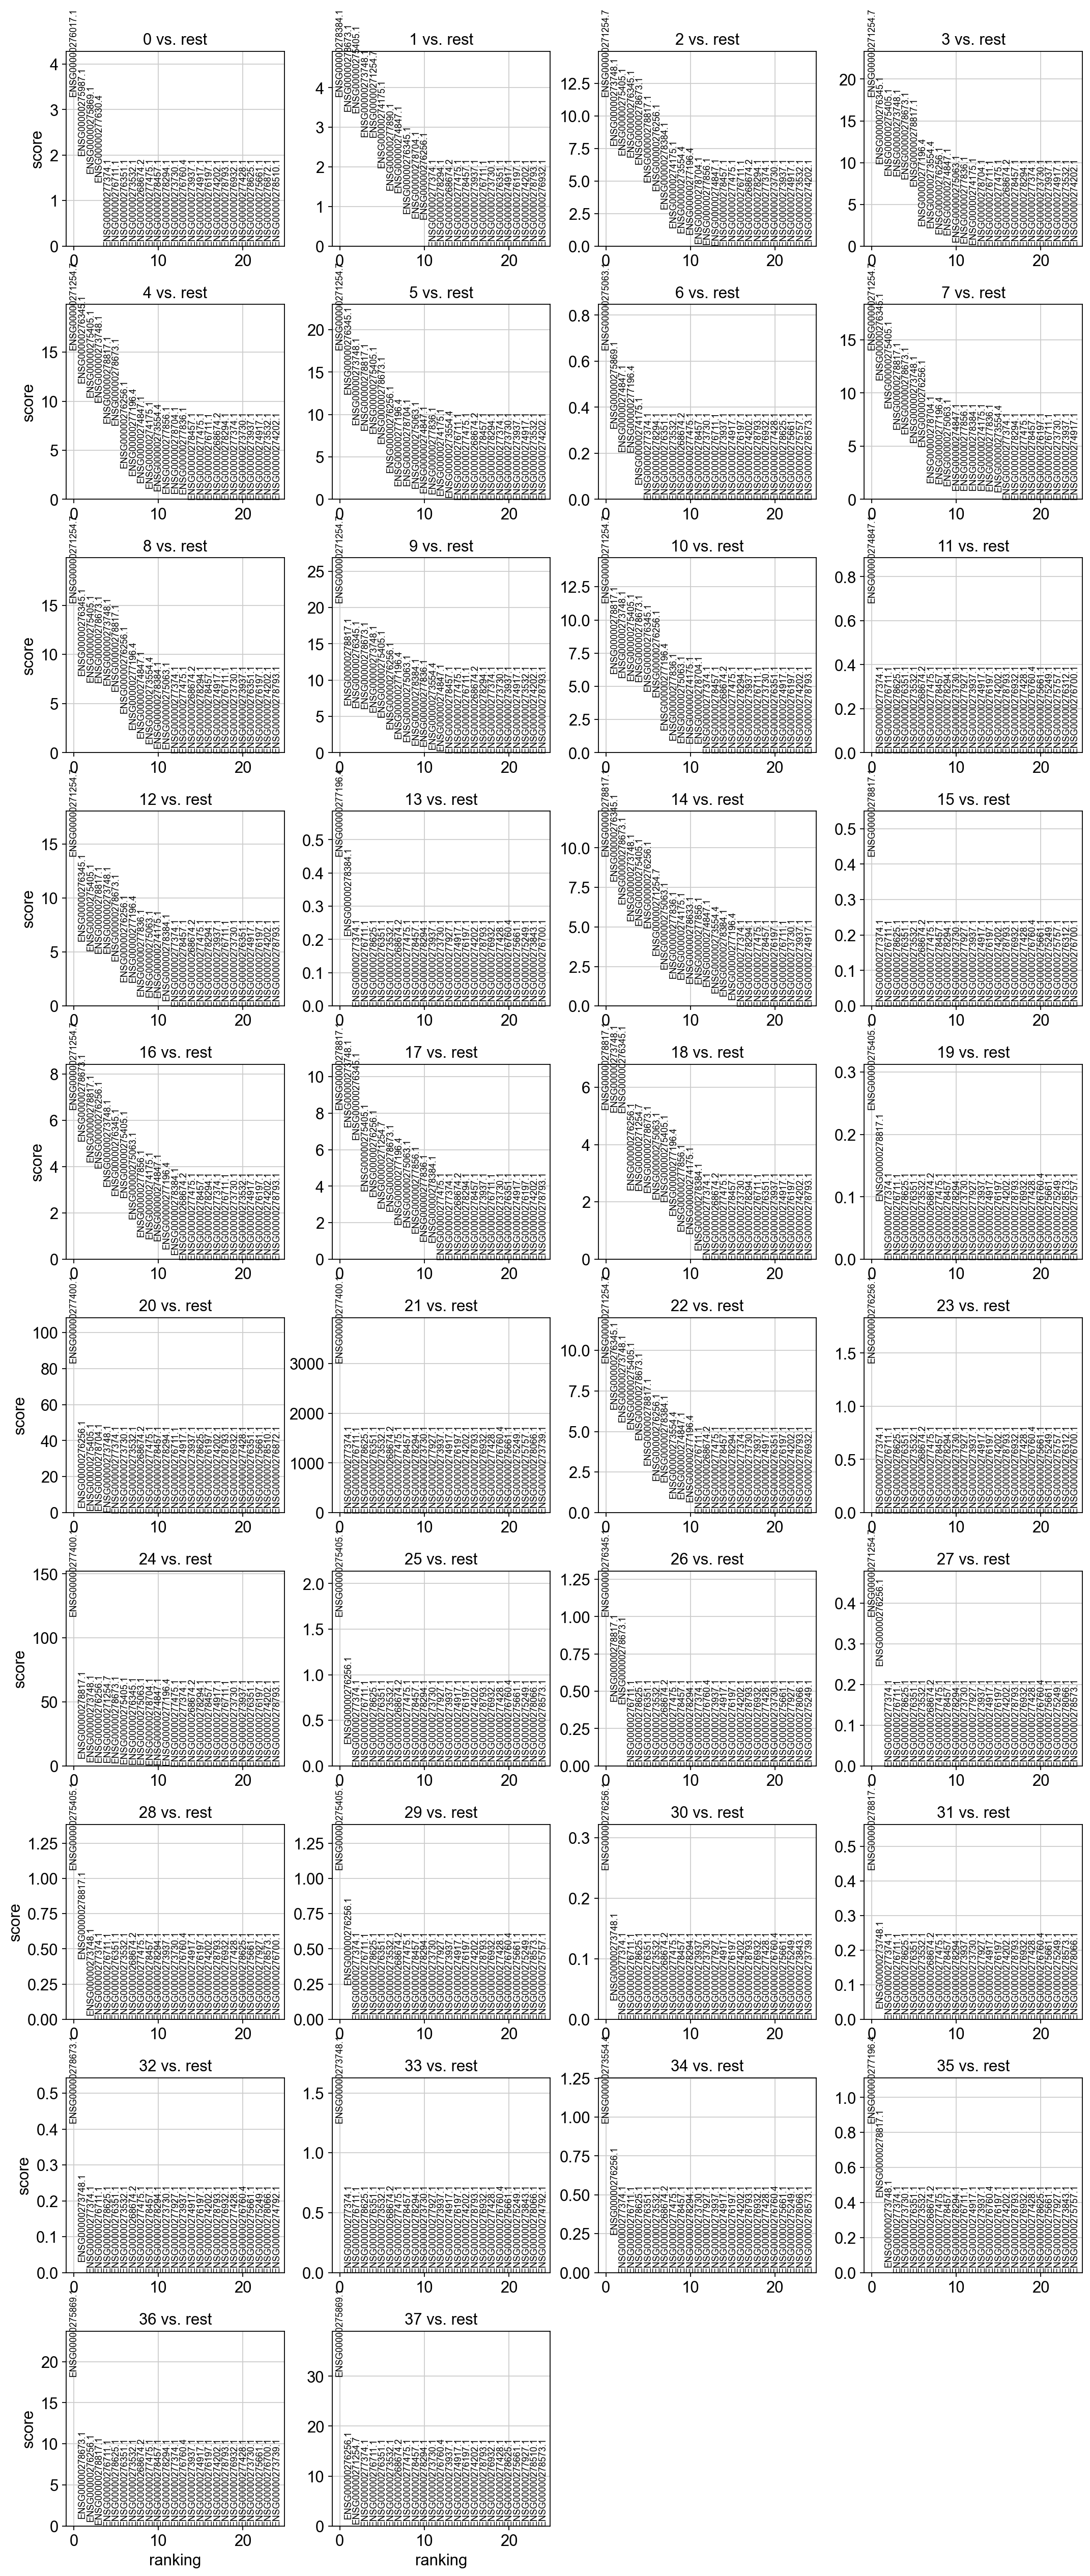

In [50]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [52]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:00)


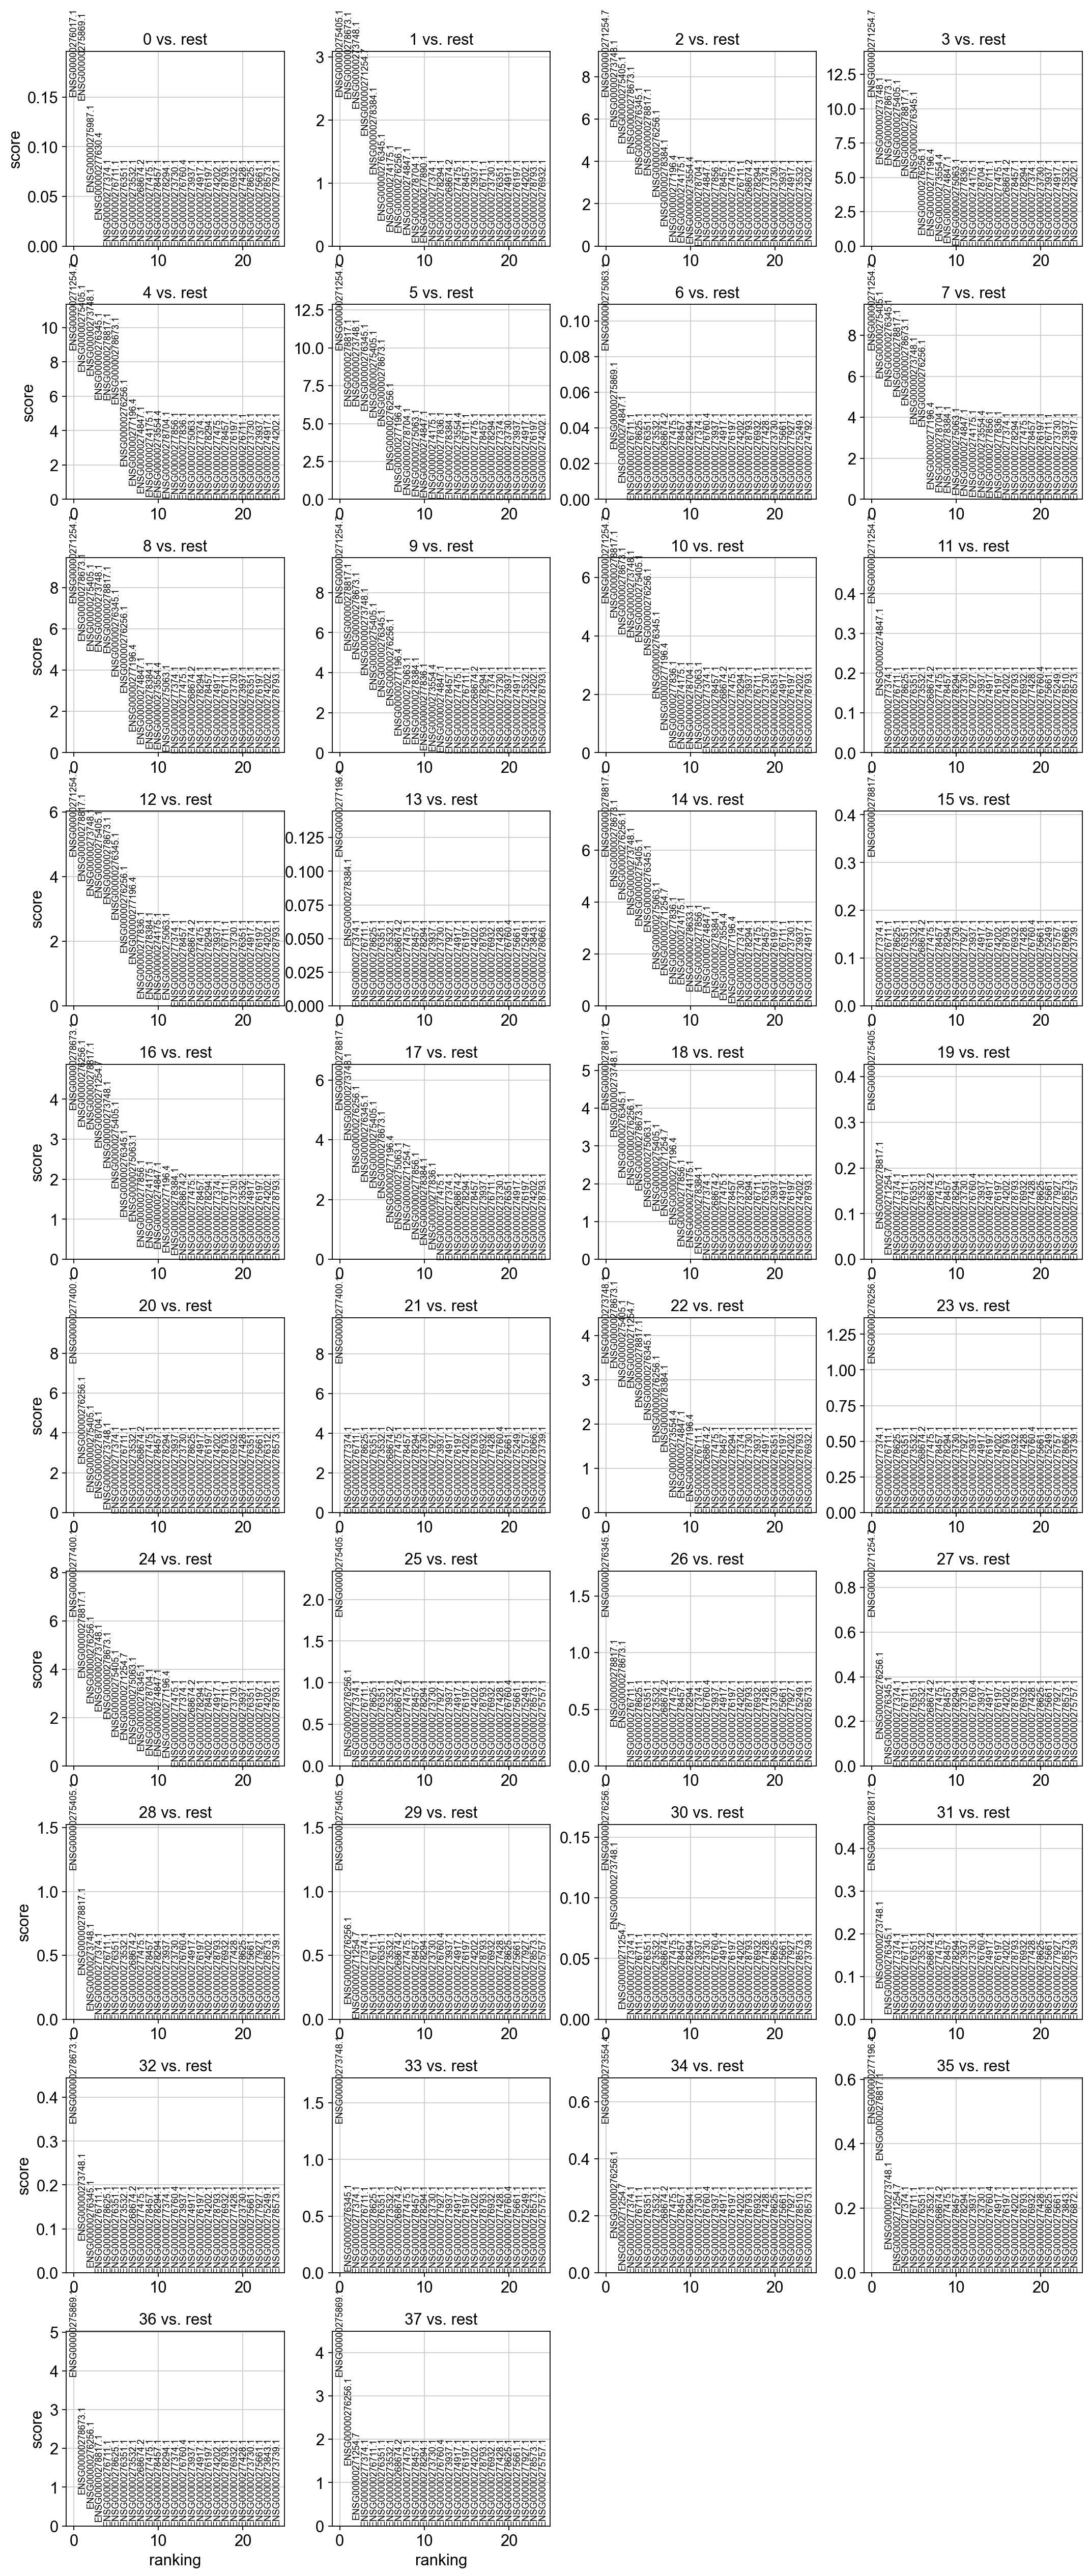

In [53]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [54]:
adata.write(results_file)

ranking genes
    finished (0:00:01)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


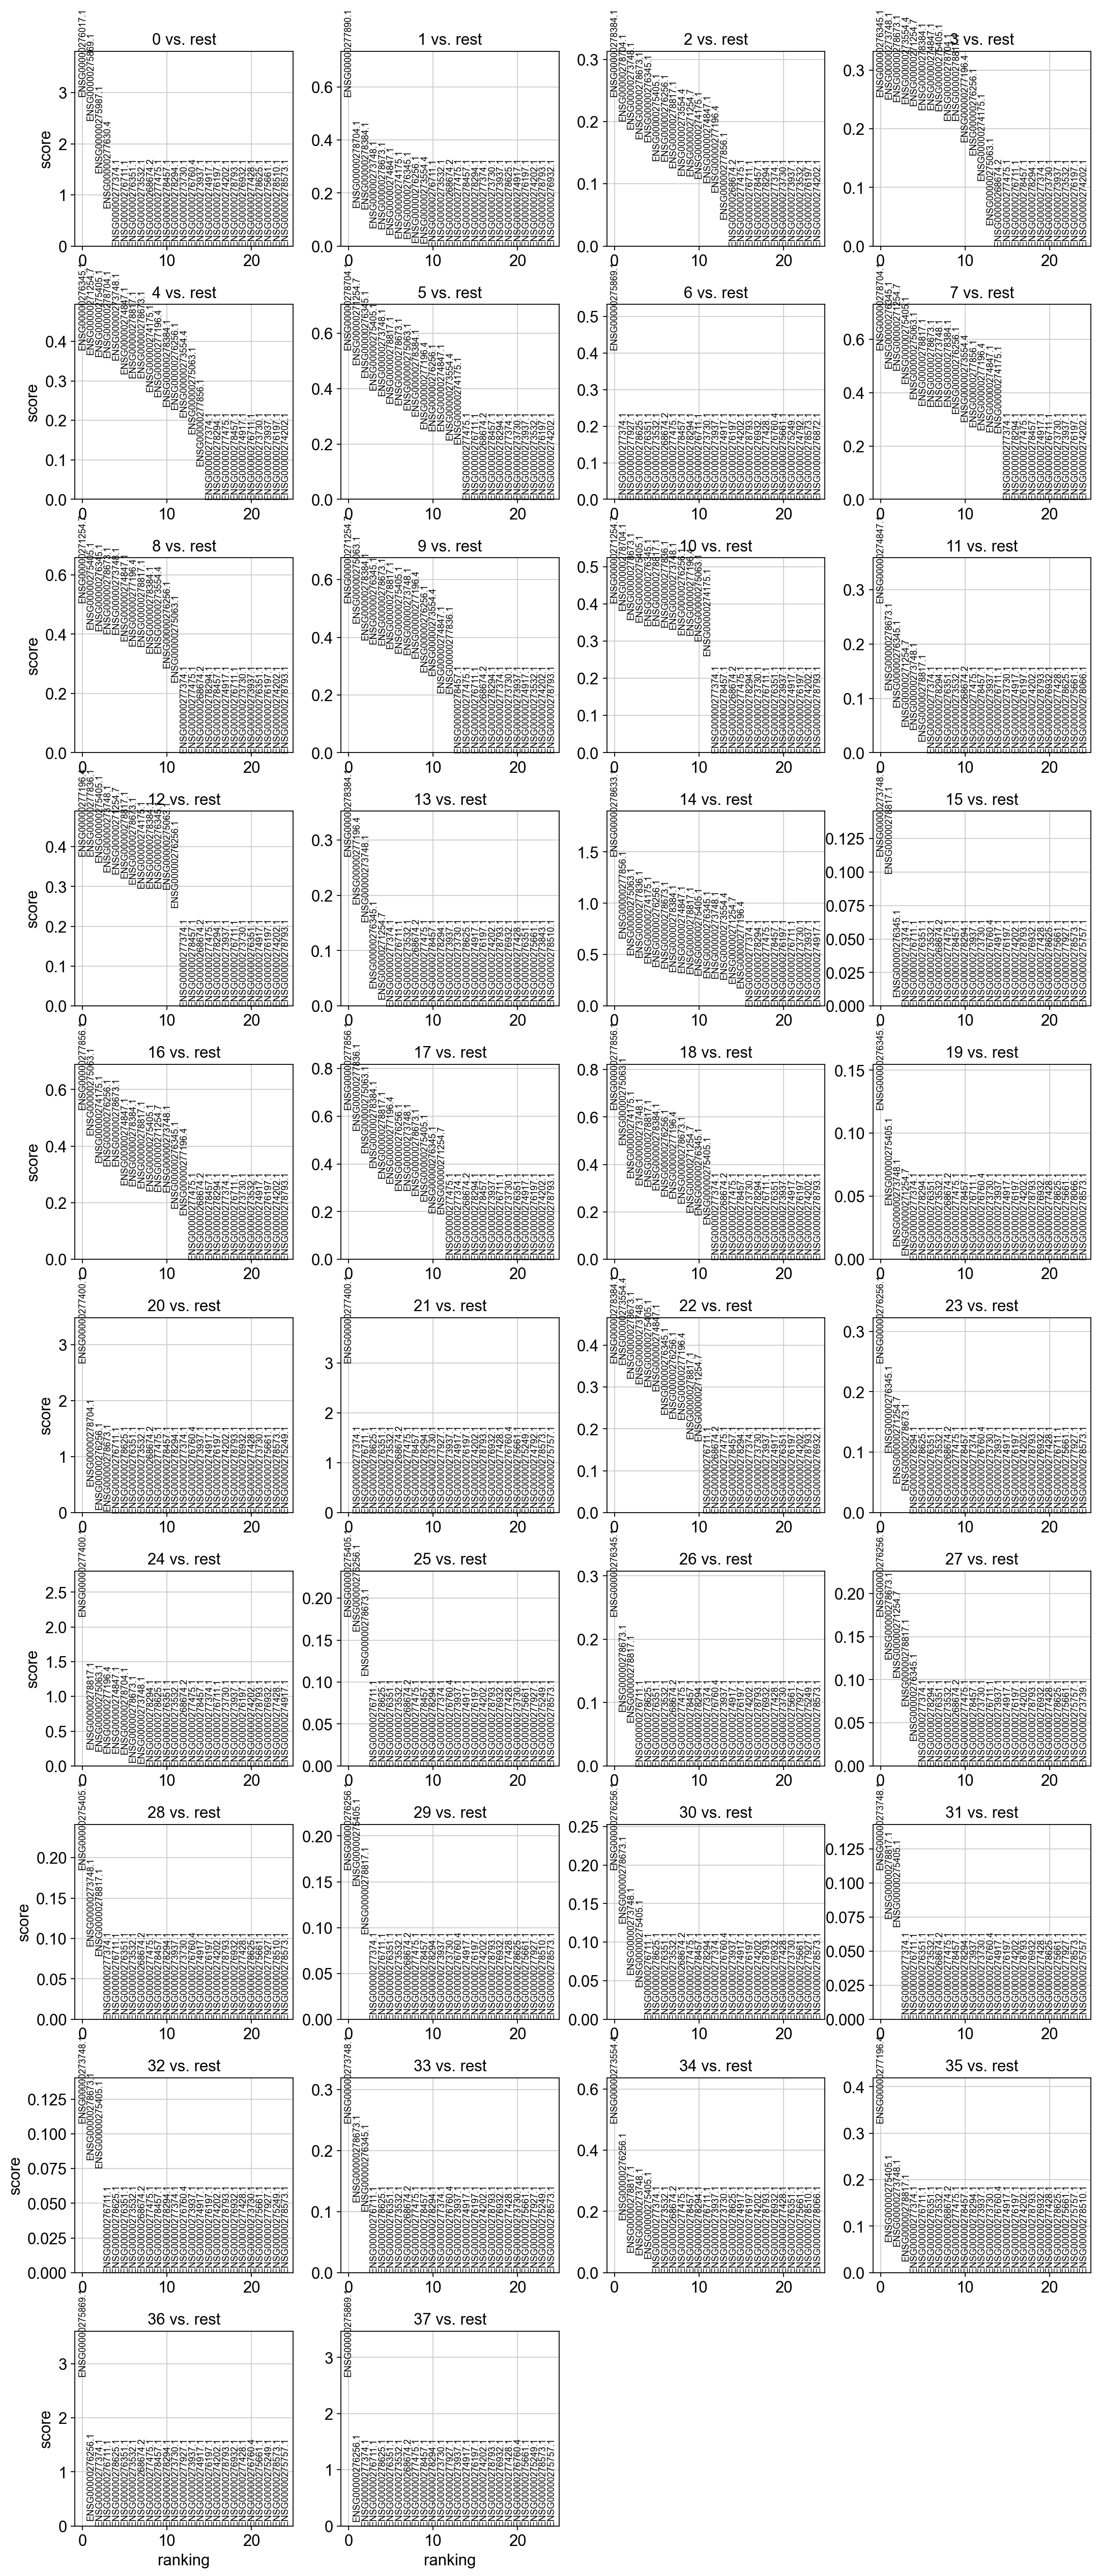

In [55]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [56]:
marker_genes = ['ENSG00000277856.1', 'ENSG00000273748.1', 'ENSG00000271254.7', 
                'ENSG00000276345.1', 'ENSG00000278704.1', 'ENSG00000277836.1']

In [57]:
adata = sc.read(results_file)

ValueError: Reading with filekey 'write/concatenation' failed, the inferred filename PosixPath('write/write/concatenation.h5ad') does not exist. If you intended to provide a filename, either use a filename ending on one of the available extensions {'loom', 'tab', 'csv', 'txt', 'tsv', 'mtx', 'soft.gz', 'h5', 'anndata', 'xlsx', 'data', 'mtx.gz', 'h5ad'} or pass the parameter `ext`.

In [58]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0                  1                  2                  3  \
0  ENSG00000276017.1  ENSG00000277890.1  ENSG00000278384.1  ENSG00000276345.1   
1  ENSG00000275869.1  ENSG00000278704.1  ENSG00000278704.1  ENSG00000273748.1   
2  ENSG00000275987.1  ENSG00000278384.1  ENSG00000273748.1  ENSG00000278673.1   
3  ENSG00000277630.4  ENSG00000273748.1  ENSG00000278673.1  ENSG00000273554.4   
4  ENSG00000277374.1  ENSG00000278673.1  ENSG00000276345.1  ENSG00000271254.7   

                   4                  5                  6                  7  \
0  ENSG00000276345.1  ENSG00000278704.1  ENSG00000275869.1  ENSG00000278704.1   
1  ENSG00000271254.7  ENSG00000271254.7  ENSG00000277374.1  ENSG00000276345.1   
2  ENSG00000275405.1  ENSG00000276345.1  ENSG00000277927.1  ENSG00000271254.7   
3  ENSG00000278704.1  ENSG00000275405.1  ENSG00000278625.1  ENSG00000275405.1   
4  ENSG00000273748.1  ENSG00000273748.1  ENSG00000276351.1  ENSG00000275063.1   

                   8                  9  ...                 28  \
0  ENSG00000271254.7  ENSG00000271254.7  ...  ENSG00000275405.1   
1  ENSG00000275405.1  ENSG00000275063.1  ...  ENSG00000273748.1   
2  ENSG00000276345.1  ENSG00000278384.1  ...  ENSG00000278817.1   
3  ENSG00000278673.1  ENSG00000276345.1  ...  ENSG00000277374.1   
4  ENSG00000273748.1  ENSG00000278673.1  ...  ENSG00000276711.1   

                  29                 30                 31                 32  \
0  ENSG00000276256.1  ENSG00000276256.1  ENSG00000273748.1  ENSG00000273748.1   
1  ENSG00000275405.1  ENSG00000278673.1  ENSG00000278817.1  ENSG00000278673.1   
2  ENSG00000278817.1  ENSG00000273748.1  ENSG00000275405.1  ENSG00000275405.1   
3  ENSG00000277374.1  ENSG00000275405.1  ENSG00000277374.1  ENSG00000276711.1   
4  ENSG00000276711.1  ENSG00000276711.1  ENSG00000276711.1  ENSG00000278625.1   

                  33                 34                 35                 36  \
0  ENSG00000273748.1  ENSG00000273554.4  ENSG00000277196.4  ENSG00000275869.1   
1  ENSG00000278673.1  ENSG00000276256.1  ENSG00000275405.1  ENSG00000276256.1   
2  ENSG00000276345.1  ENSG00000278817.1  ENSG00000273748.1  ENSG00000277374.1   
3  ENSG00000276711.1  ENSG00000273748.1  ENSG00000278817.1  ENSG00000276711.1   
4  ENSG00000278625.1  ENSG00000275405.1  ENSG00000277374.1  ENSG00000278625.1   

                  37  
0  ENSG00000275869.1  
1  ENSG00000276256.1  
2  ENSG00000277374.1  
3  ENSG00000276711.1  
4  ENSG00000278625.1  

[5 rows x 38 columns]

In [59]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

KeyError: 'pvals'

ranking genes
    finished (0:00:00)


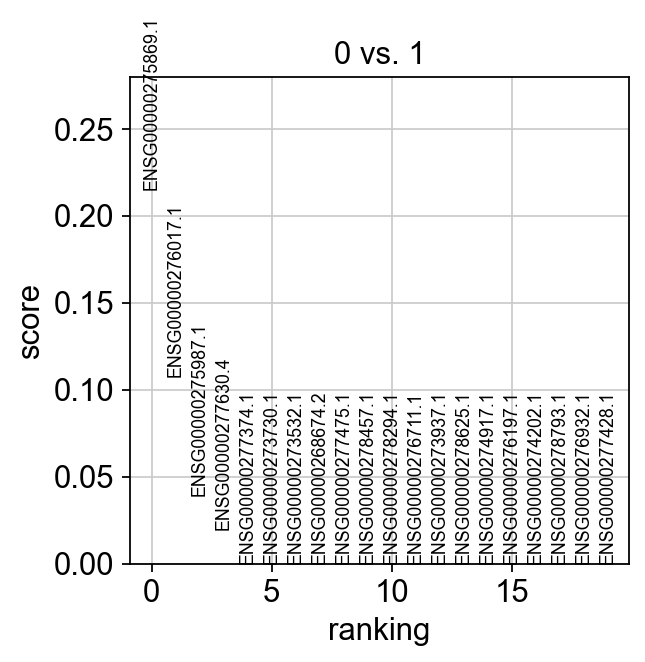

In [60]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

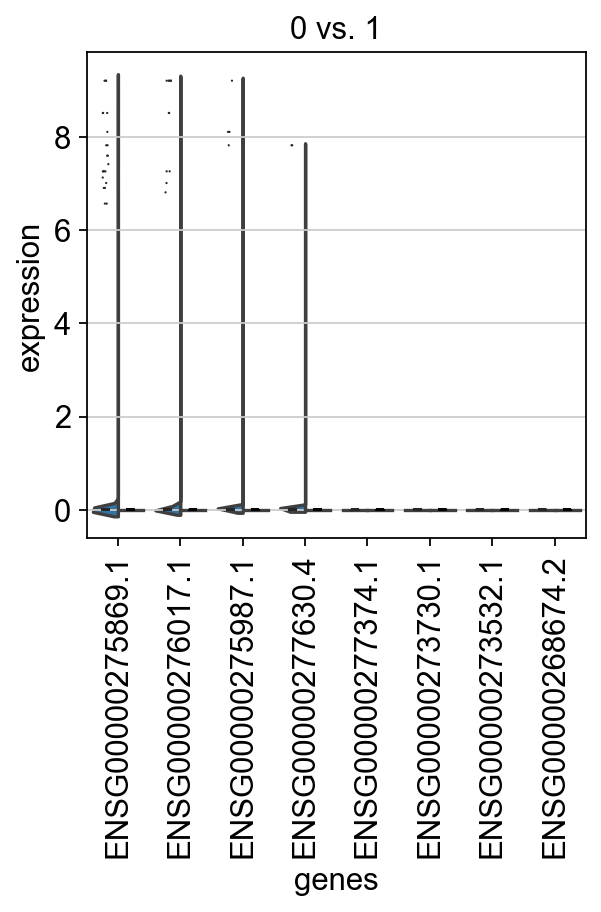

In [61]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [62]:
adata = sc.read(results_file)

ValueError: Reading with filekey 'write/concatenation' failed, the inferred filename PosixPath('write/write/concatenation.h5ad') does not exist. If you intended to provide a filename, either use a filename ending on one of the available extensions {'loom', 'tab', 'csv', 'txt', 'tsv', 'mtx', 'soft.gz', 'h5', 'anndata', 'xlsx', 'data', 'mtx.gz', 'h5ad'} or pass the parameter `ext`.

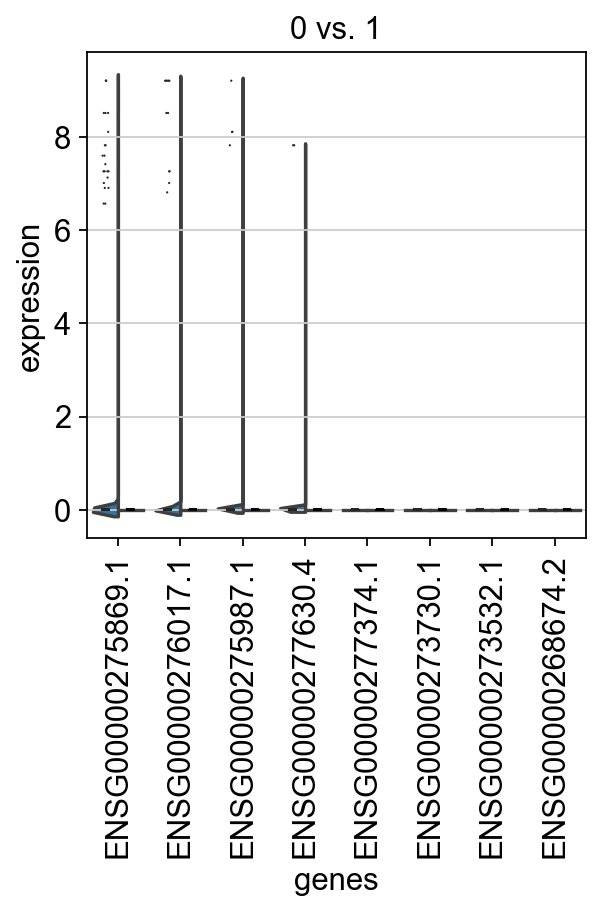

In [63]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

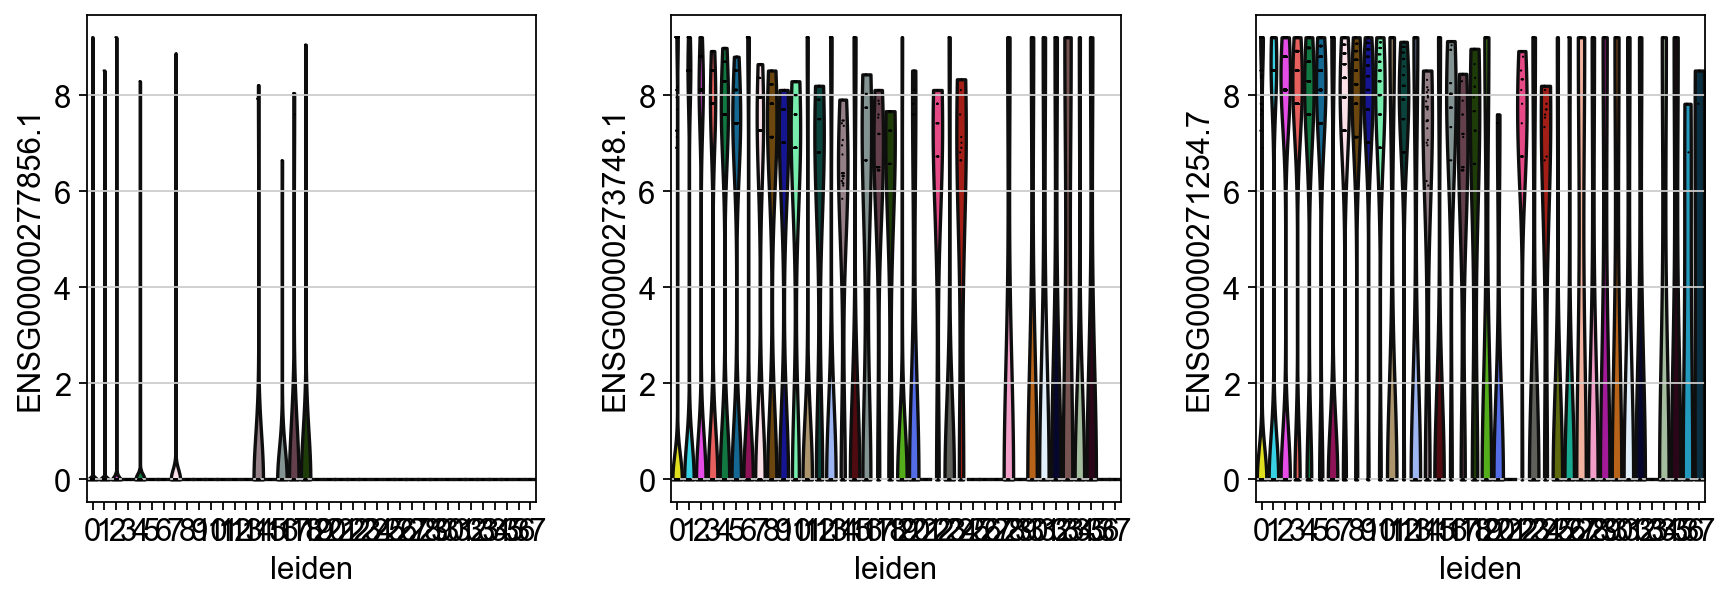

In [64]:
sc.pl.violin(adata, ['ENSG00000277856.1', 'ENSG00000273748.1', 'ENSG00000271254.7'], groupby='leiden')

In [65]:
new_cluster_names = ['Plasma cells', 'Ionocytes',
    'Spermatocytes', 'Extravillous trophoblasts',
    'Alveolar cells type 2', 'B-cells']
adata.rename_categories('leiden', new_cluster_names)

ValueError: new categories need to have the same number of items as the old categories!

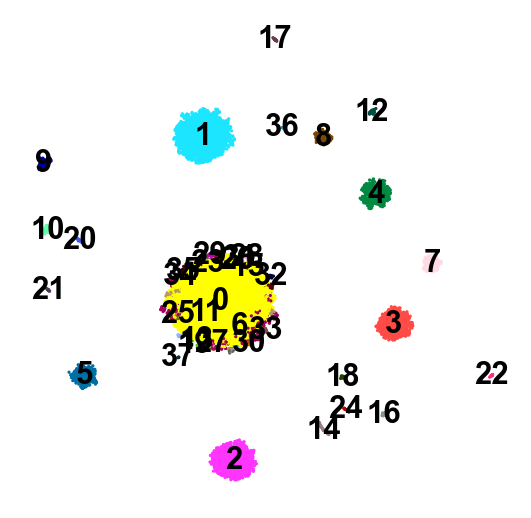

In [66]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')


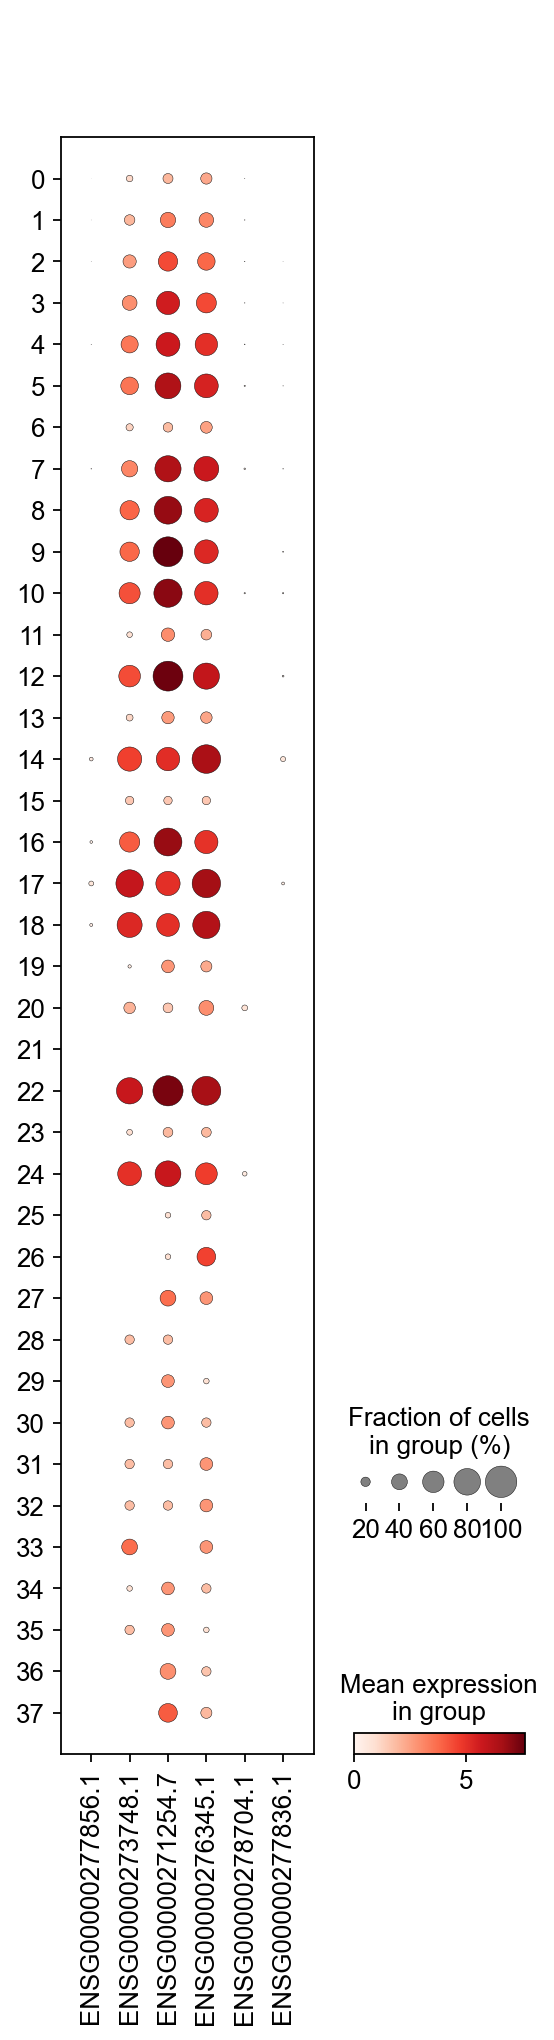

In [67]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');


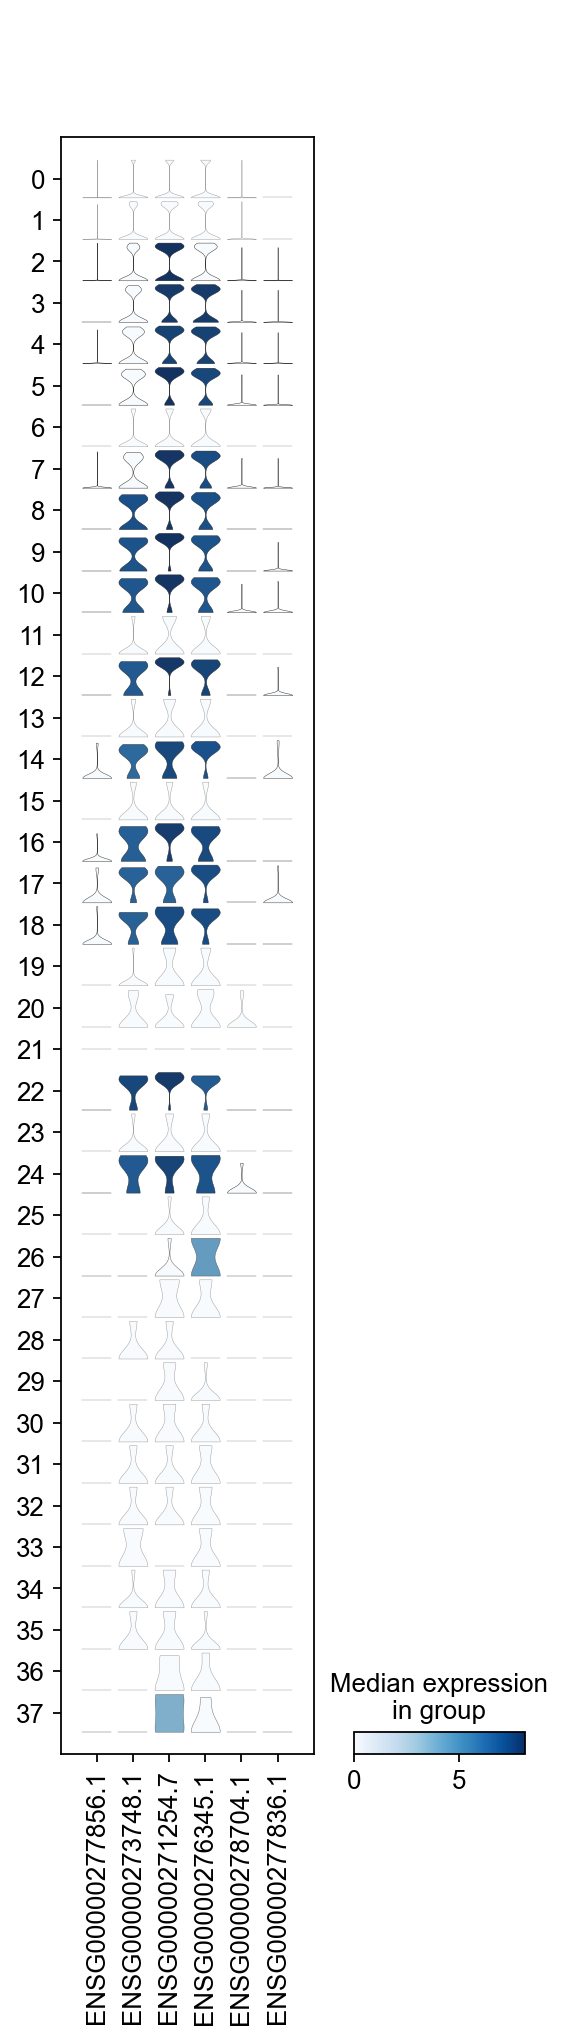

In [68]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);


In [69]:
adata

AnnData object with n_obs × n_vars = 14131 × 6
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'